# Pembuatan Dataset Sintetis


Untuk mempelajari DBSCAN, kita akan membuat dataset sederhana berupa 3 klaster buatan menggunakan fungsi  make_blobs  dari Scikit-Learn.

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"   # untuk menghindari warning KMeans di Windows

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# normalisasi data
X = StandardScaler().fit_transform(X)


Visualisasikan data yang dihasilkan dengan cara ini:



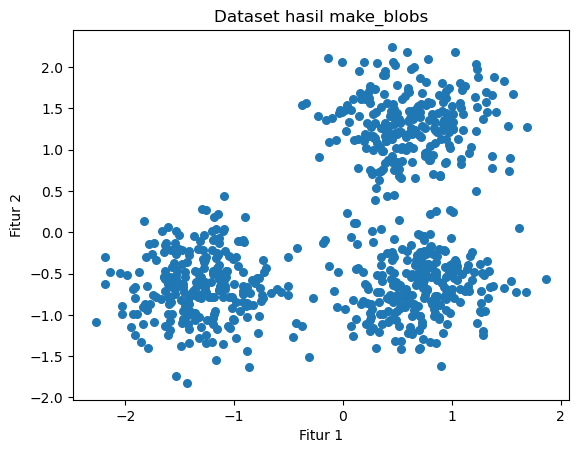

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=30)  # X[:, 0] = koordinat x, X[:, 1] = koordinat y
plt.title("Dataset hasil make_blobs")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

# Compute DBSCAN

Sekarang kita terapkan DBSCAN pada data tersebut.

Label yang ditetapkan oleh DBSCAN dapat diakses melalui atribut labels_. Titik data yang dianggap noise akan diberi label khusus.



In [9]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Jalankan DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Jumlah cluster (tidak termasuk noise)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 18


- eps=0.3 → jarak maksimum antar titik untuk dianggap tetangga.
- min_samples=10 → jumlah minimum titik dalam radius eps agar dianggap area padat (core sample).
- Label hasil klasterisasi tersedia di labels. Nilai -1 berarti titik tersebut dianggap noise atau outlier.

# Evaluasi Kualitas Klasterisasi

Karena kita menggunakan dataset sintetis (make_blobs), kita tahu label aslinya (labels_true). Ini memungkinkan kita mengukur kualitas DBSCAN dengan berbagai metrik evaluasi.



In [11]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626



- Homogeneity → apakah tiap klaster hanya berisi satu label asli.
- Completeness → apakah semua sampel dengan label asli yang sama masuk ke klaster yang sama.
- V-measure → rata-rata harmonik dari homogeneity dan completeness.
- Adjusted Rand Index (ARI) → kesesuaian antara klasterisasi dengan label asli.
- Adjusted Mutual Information (AMI) → kesamaan informasi antara klasterisasi dengan label asli.
- Silhouette Coefficient → seberapa baik data dikelompokkan (nilai mendekati 1 berarti bagus, mendekati 0 berarti berada di batas, negatif berarti salah klaster).

# Visualisasi Hasil Klasterisasi


Kita akan memvisualisasikan hasil DBSCAN.

- Core sample ditampilkan dengan titik besar.
- Non-core sample ditampilkan dengan titik kecil.
- Noise ditampilkan dengan warna hitam.

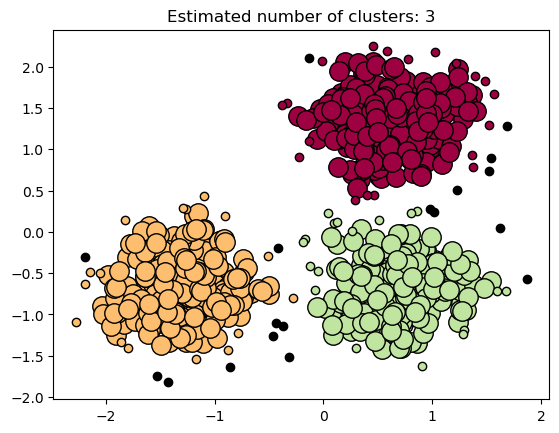

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Mask untuk menandai core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Warna tiap cluster
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


Interpretasi visual:

- Titik besar berwarna → core samples dalam klaster.
- Titik kecil berwarna → non-core samples, tetap termasuk klaster.
- Titik hitam → noise/outlier.